In [49]:
import os
import pandas as pd
import tensorflow as tf
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.image import imread

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import  Activation, Dense, Conv2D, MaxPool2D,MaxPooling2D, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization

from sklearn.utils import class_weight
from tensorflow.keras.preprocessing import image
from sklearn.metrics import classification_report,confusion_matrix

In [42]:
Parasitized = '/kaggle/input/cell-images-for-detecting-malaria/cell_images/cell_images/Parasitized/'
Uninfected = '/kaggle/input/cell-images-for-detecting-malaria/cell_images/cell_images/Uninfected/'

In [43]:
print('Parasitized lenght:', len(os.listdir(Parasitized)))
print('Uninfected lenght:', len(os.listdir(Uninfected)))

Parasitized lenght: 13780
Uninfected lenght: 13780


In [10]:
img_classes  = os.listdir("/kaggle/input/cell-images-for-detecting-malaria/cell_images/cell_images")
print(img_classes)

['Uninfected', 'Parasitized']


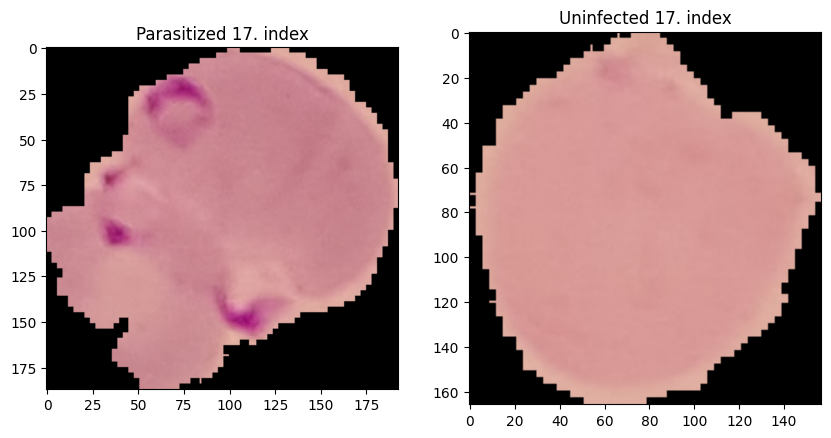

Parasitized shape: (187, 193, 3)
Uninfected shape: (166, 157, 3)


In [ ]:
def display_parasitized_uninfected_images(Parasitized, Uninfected, index=17):
    para_cell_Para = Parasitized + os.listdir(Parasitized)[index]
    para_cell_Unin = Uninfected + os.listdir(Uninfected)[index]
    
    fig, axes = plt.subplots(1, 2, figsize=(10, 5))

    axes[0].imshow(imread(para_cell_Para))
    axes[0].set_title(f"Parasitized {index}. index")

    axes[1].imshow(imread(para_cell_Unin))
    axes[1].set_title(f"Uninfected {index}. index")

    plt.show()

    print('Parasitized shape:', imread(para_cell_Para).shape)
    print('Uninfected shape:', imread(para_cell_Unin).shape)


display_parasitized_uninfected_images(Parasitized, Uninfected, index=17)

In [45]:
print ('Parasitized', np.mean(x))
print ('Parasitized', np.mean(y))

Parasitized 133.6440953981929
Parasitized 132.9320760664005


In [ ]:

data_dir = '/kaggle/input/cell-images-for-detecting-malaria/cell_images/cell_images/'

filepaths = []
labels = []

folds = os.listdir(data_dir)
for fold in folds:
    foldpath = os.path.join(data_dir, fold)
    filelist = os.listdir(foldpath)
    for file in filelist:
        fpath = os.path.join(foldpath, file)
        filepaths.append(fpath)
        labels.append(fold)

df = pd.DataFrame({
    'filepaths': filepaths,
    'labels': labels
})

train_df, test_df = train_test_split(df, train_size=0.8, shuffle=True, random_state=123)

valid_df, test_df = train_test_split(test_df, train_size=0.5, shuffle=True, random_state=123)

print(train_df.head())

                                               filepaths       labels
17396  /kaggle/input/cell-images-for-detecting-malari...  Parasitized
9451   /kaggle/input/cell-images-for-detecting-malari...   Uninfected
6979   /kaggle/input/cell-images-for-detecting-malari...   Uninfected
4704   /kaggle/input/cell-images-for-detecting-malari...   Uninfected
25779  /kaggle/input/cell-images-for-detecting-malari...  Parasitized


In [ ]:
image_shape = (130,130,3) 

In [16]:
model = Sequential()

model.add(Conv2D(filters=16, kernel_size=(3,3),input_shape=image_shape, activation='relu', padding='same'))
model.add(BatchNormalization()) 
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='same'))
model.add(BatchNormalization()) 
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='same')) 
model.add(BatchNormalization()) 
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Conv2D(filters=128, kernel_size=(3,3), activation='relu', padding='same')) 
model.add(BatchNormalization()) 
model.add(MaxPool2D(pool_size=(2, 2)))

model.add(Flatten())

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 130, 130, 16)   │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 130, 130, 16)   │            64 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 65, 65, 16)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 65, 65, 32)     │         4,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 65, 65, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       524,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 622,817 (2.38 MB)

 Trainable params: 622,337 (2.37 MB)

 Non-trainable params: 480 (1.88 KB)

In [ ]:
image_gen = ImageDataGenerator() 


train_generator = image_gen.flow_from_dataframe(dataframe=train_df,x_col='filepaths',y_col='labels',
                                                target_size=(130, 130), class_mode='binary',
                                                batch_size=32,shuffle=True)


valid_generator = image_gen.flow_from_dataframe(dataframe=valid_df,x_col='filepaths',
                                                y_col='labels',target_size=(130, 130),
                                                class_mode='binary',batch_size=32,shuffle=False)

Found 22046 validated image filenames belonging to 2 classes.


/opt/conda/lib/python3.10/site-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 2 invalid image filename(s) in x_col="filepaths". These filename(s) will be ignored.
  warnings.warn(


Found 2756 validated image filenames belonging to 2 classes.


In [ ]:

y_train = train_df['labels'].values   


class_weights = class_weight.compute_class_weight('balanced',
                                                classes=np.unique(y_train),
                                                y=y_train)


class_weights = {0: class_weights[0], 1: class_weights[1]}

print("Class Weights:", class_weights)

Class Weights: {0: 1.0006353816828537, 1: 0.9993654247121748}


In [20]:
early_stop = EarlyStopping(monitor='val_loss',patience=5)

# Modeli eğit
history = model.fit(
    train_generator,
    epochs=20,
    validation_data=valid_generator,
    class_weight=class_weights,
    callbacks=[early_stop]
)

Epoch 1/20


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()
I0000 00:00:1747112524.954349      85 service.cc:145] XLA service 0x790c54005980 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1747112524.954433      85 service.cc:153]   StreamExecutor device (0): Tesla P100-PCIE-16GB, Compute Capability 6.0


  1/689 ━━━━━━━━━━━━━━━━━━━━ 1:44:06 9s/step - accuracy: 0.5938 - loss: 1.2772

I0000 00:00:1747112529.872886      85 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


689/689 ━━━━━━━━━━━━━━━━━━━━ 152s 207ms/step - accuracy: 0.6478 - loss: 0.7913 - val_accuracy: 0.9427 - val_loss: 0.1797
Epoch 2/20
689/689 ━━━━━━━━━━━━━━━━━━━━ 40s 58ms/step - accuracy: 0.9359 - loss: 0.2103 - val_accuracy: 0.9521 - val_loss: 0.1422
Epoch 3/20
689/689 ━━━━━━━━━━━━━━━━━━━━ 40s 57ms/step - accuracy: 0.9400 - loss: 0.1910 - val_accuracy: 0.9550 - val_loss: 0.1454
Epoch 4/20
689/689 ━━━━━━━━━━━━━━━━━━━━ 41s 59ms/step - accuracy: 0.9510 - loss: 0.1647 - val_accuracy: 0.9445 - val_loss: 0.1641
Epoch 5/20
689/689 ━━━━━━━━━━━━━━━━━━━━ 41s 59ms/step - accuracy: 0.9521 - loss: 0.1449 - val_accuracy: 0.9343 - val_loss: 0.1909
Epoch 6/20
689/689 ━━━━━━━━━━━━━━━━━━━━ 39s 56ms/step - accuracy: 0.9545 - loss: 0.1463 - val_accuracy: 0.9575 - val_loss: 0.1227
Epoch 7/20
689/689 ━━━━━━━━━━━━━━━━━━━━ 40s 57ms/step - accuracy: 0.9557 - loss: 0.1392 - val_accuracy: 0.9485 - val_loss: 0.1236
Epoch 8/20
689/689 ━━━━━━━━━━━━━━━━━━━━ 41s 58ms/step - accuracy: 0.9600 - loss: 0.1187 - val_accur

In [21]:
# Generator for test set 
test_generator = ImageDataGenerator().flow_from_dataframe(dataframe=test_df,x_col='filepaths',
                                                          y_col='labels',target_size=(130, 130),
                                                          class_mode='binary',batch_size=32,
                                                          shuffle=False )

# Evaluate the performance of the model on the test set
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_acc}")


Found 2756 validated image filenames belonging to 2 classes.
 2/87 ━━━━━━━━━━━━━━━━━━━━ 4s 54ms/step - accuracy: 0.9688 - loss: 0.0525

/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


87/87 ━━━━━━━━━━━━━━━━━━━━ 15s 170ms/step - accuracy: 0.9691 - loss: 0.1126
Test Loss: 0.12271145731210709, Test Accuracy: 0.9662554264068604


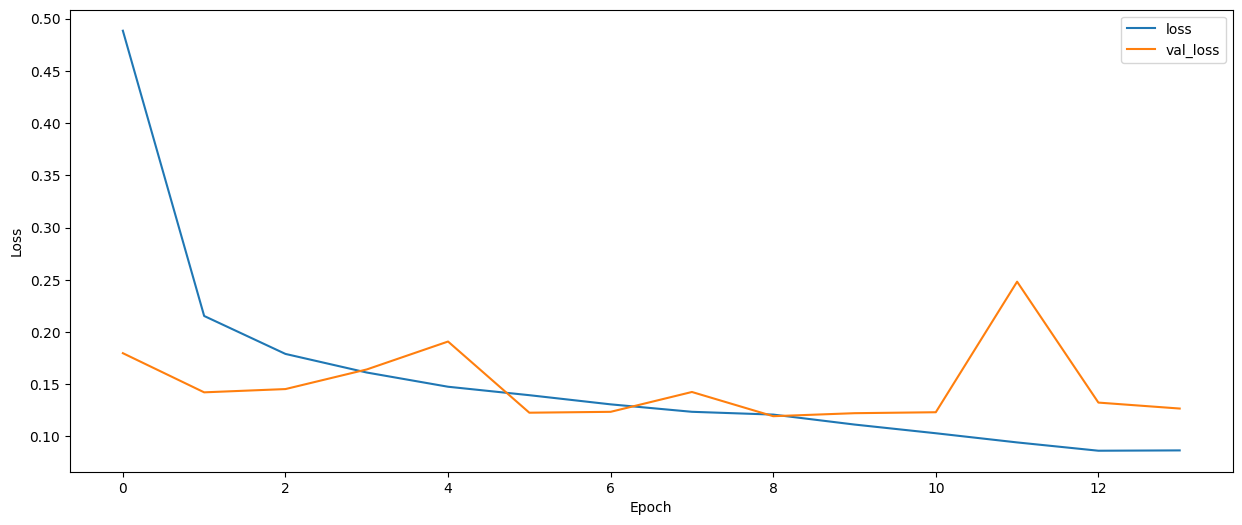

In [22]:
summary = pd.DataFrame(history.history)
plt.figure(figsize=(15, 6))
plt.plot(summary.loss, label="loss")
plt.plot(summary.val_loss, label="val_loss")
plt.legend(loc="upper right")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()

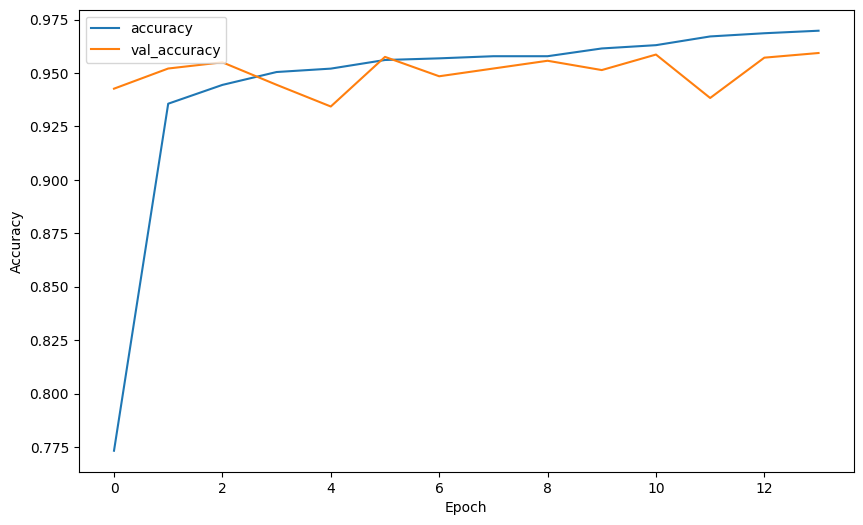

In [23]:
plt.figure(figsize=(10,6))
plt.plot(summary.accuracy, label="accuracy")
plt.plot(summary.val_accuracy, label="val_accuracy")
plt.legend(loc="upper left")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()

In [24]:
pred_probabilities = model.predict(test_generator)
predictions = pred_probabilities > 0.5
print(classification_report(test_generator.classes,predictions))

87/87 ━━━━━━━━━━━━━━━━━━━━ 5s 51ms/step
              precision    recall  f1-score   support

           0       0.98      0.95      0.97      1370
           1       0.95      0.98      0.97      1386

    accuracy                           0.97      2756
   macro avg       0.97      0.97      0.97      2756
weighted avg       0.97      0.97      0.97      2756



In [25]:
confusion_matrix(test_generator.classes,predictions)

array([[1298,   72],
       [  21, 1365]])

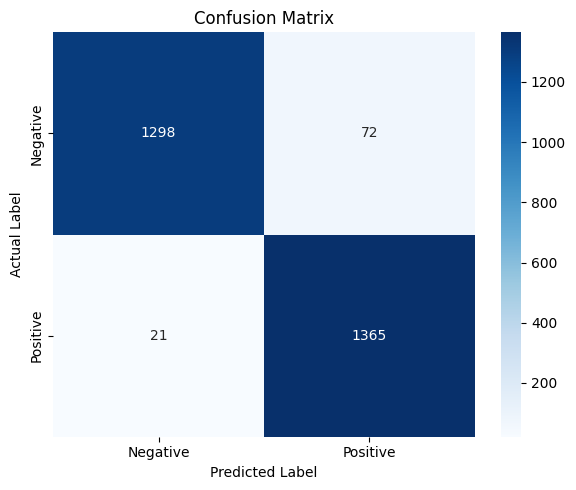

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Confusion matrix values
conf_matrix = np.array([[1298, 72],
                        [21, 1365]])

# Class names
class_names = ['Negative', 'Positive']

# Plot
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)

plt.xlabel('Predicted Label')
plt.ylabel('Actual Label')
plt.title('Confusion Matrix')
plt.tight_layout()
plt.show()


In [26]:
from tensorflow.keras.saving import save_model

save_model(model, 'malaria_model.keras')

# CNN (with data augmentation)

In [ ]:
aug_model = Sequential()

aug_model.add(Conv2D(filters=32, kernel_size=(3,3),input_shape=image_shape, padding='same', activation='relu',))
aug_model.add(BatchNormalization())

aug_model.add(Conv2D(filters=64, kernel_size=(3,3), padding='same', activation='relu',))
aug_model.add(BatchNormalization())
aug_model.add(MaxPooling2D(pool_size=(2, 2)))

aug_model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu',))
aug_model.add(BatchNormalization())
aug_model.add(MaxPooling2D(pool_size=(2, 2)))

aug_model.add(Conv2D(filters=128, kernel_size=(3,3), padding='same', activation='relu',))
aug_model.add(BatchNormalization())
aug_model.add(MaxPooling2D(pool_size=(2, 2)))

aug_model.add(Flatten())

aug_model.add(Dense(64))
aug_model.add(Activation('relu'))

aug_model.add(Dropout(0.3))

aug_model.add(Dense(1))
aug_model.add(Activation('sigmoid'))          ### 

aug_model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [28]:
aug_model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 130, 130, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 130, 130, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 130, 130, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 130, 130, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 65, 65, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 65, 65, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 65, 65, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 32, 32, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │     2,097,216 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            65 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 1)              │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,339,521 (8.92 MB)

 Trainable params: 2,338,817 (8.92 MB)

 Non-trainable params: 704 (2.75 KB)

In [29]:
target_size=(130, 130)

In [30]:
image_gen = ImageDataGenerator(rotation_range=30, 
                               width_shift_range=0.15, 
                               height_shift_range=0.15, 
                               #rescale=1/255,           ==> data pre-scaled
                               shear_range=0.2, 
                               zoom_range=0.2, 
                               horizontal_flip=True,
                               vertical_flip=True,
                               fill_mode='nearest')

# Generator for train set
train_generator = image_gen.flow_from_dataframe(dataframe=train_df,x_col='filepaths',y_col='labels',
                                                target_size=(130, 130), class_mode='binary',
                                                batch_size=32,shuffle=True)



valid_image_gen = ImageDataGenerator()

# Generator for validation set
valid_generator = valid_image_gen.flow_from_dataframe(dataframe=valid_df,x_col='filepaths',
                                                y_col='labels',target_size=(130, 130),
                                                class_mode='binary',batch_size=32,shuffle=False)

Found 22046 validated image filenames belonging to 2 classes.
Found 2756 validated image filenames belonging to 2 classes.


/opt/conda/lib/python3.10/site-packages/keras/src/legacy/preprocessing/image.py:920: UserWarning: Found 2 invalid image filename(s) in x_col="filepaths". These filename(s) will be ignored.
  warnings.warn(


In [31]:
early_stop = EarlyStopping(monitor='val_loss',patience=5)

# Modeli eğit
history = aug_model.fit(
    train_generator,
    epochs=20,
    validation_data=valid_generator,
    class_weight=class_weights,
    callbacks=[early_stop]
)

Epoch 1/20


/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


689/689 ━━━━━━━━━━━━━━━━━━━━ 131s 176ms/step - accuracy: 0.6124 - loss: 0.8477 - val_accuracy: 0.8882 - val_loss: 0.3151
Epoch 2/20
689/689 ━━━━━━━━━━━━━━━━━━━━ 116s 166ms/step - accuracy: 0.8697 - loss: 0.3323 - val_accuracy: 0.9115 - val_loss: 0.2328
Epoch 3/20
689/689 ━━━━━━━━━━━━━━━━━━━━ 116s 167ms/step - accuracy: 0.9149 - loss: 0.2544 - val_accuracy: 0.9336 - val_loss: 0.1748
Epoch 4/20
689/689 ━━━━━━━━━━━━━━━━━━━━ 117s 169ms/step - accuracy: 0.9192 - loss: 0.2381 - val_accuracy: 0.9100 - val_loss: 0.2737
Epoch 5/20
689/689 ━━━━━━━━━━━━━━━━━━━━ 116s 167ms/step - accuracy: 0.9337 - loss: 0.2139 - val_accuracy: 0.8879 - val_loss: 0.3935
Epoch 6/20
689/689 ━━━━━━━━━━━━━━━━━━━━ 117s 168ms/step - accuracy: 0.9328 - loss: 0.2161 - val_accuracy: 0.8948 - val_loss: 0.3141
Epoch 7/20
689/689 ━━━━━━━━━━━━━━━━━━━━ 117s 168ms/step - accuracy: 0.9334 - loss: 0.2016 - val_accuracy: 0.9488 - val_loss: 0.1550
Epoch 8/20
689/689 ━━━━━━━━━━━━━━━━━━━━ 116s 167ms/step - accuracy: 0.9350 - loss: 0.20

In [32]:
# Generator for test set 
test_generator = ImageDataGenerator().flow_from_dataframe(dataframe=test_df,x_col='filepaths',
                                                          y_col='labels',target_size=(130, 130),
                                                          class_mode='binary',batch_size=32,
                                                          shuffle=False )

# Evaluate the performance of the model on the test set
test_loss, test_acc = aug_model.evaluate(test_generator)
print(f"Test Loss: {test_loss}, Test Accuracy: {test_acc}")

Found 2756 validated image filenames belonging to 2 classes.
 3/87 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - accuracy: 0.9288 - loss: 0.2236

/opt/conda/lib/python3.10/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


87/87 ━━━━━━━━━━━━━━━━━━━━ 4s 48ms/step - accuracy: 0.9260 - loss: 0.1956
Test Loss: 0.2016468495130539, Test Accuracy: 0.9230769276618958


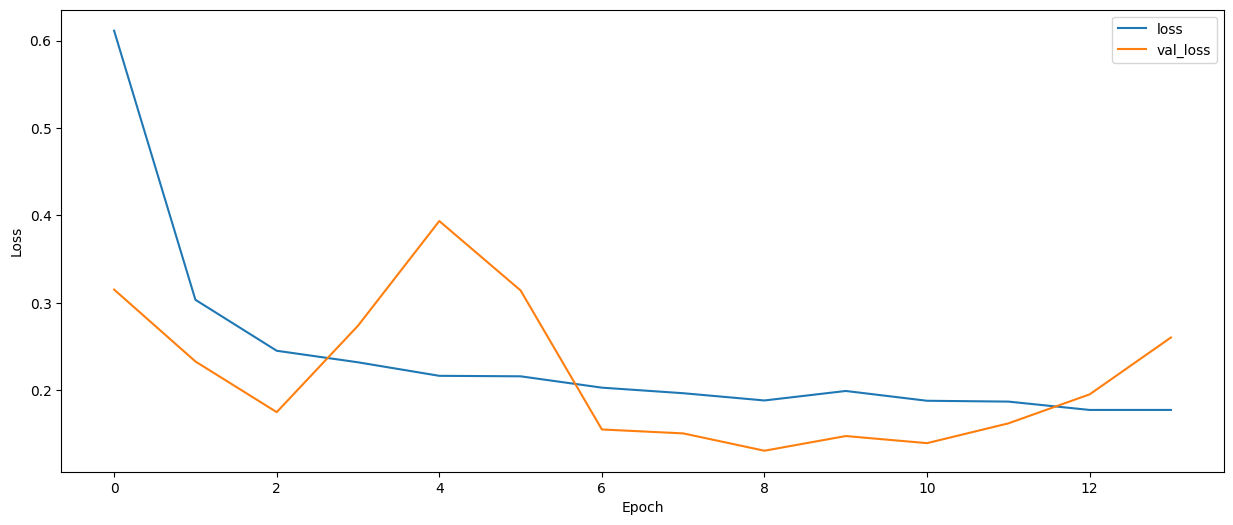

In [33]:
summary = pd.DataFrame(history.history)
plt.figure(figsize=(15, 6))
plt.plot(summary.loss, label="loss")
plt.plot(summary.val_loss, label="val_loss")
plt.legend(loc="upper right")
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.show()

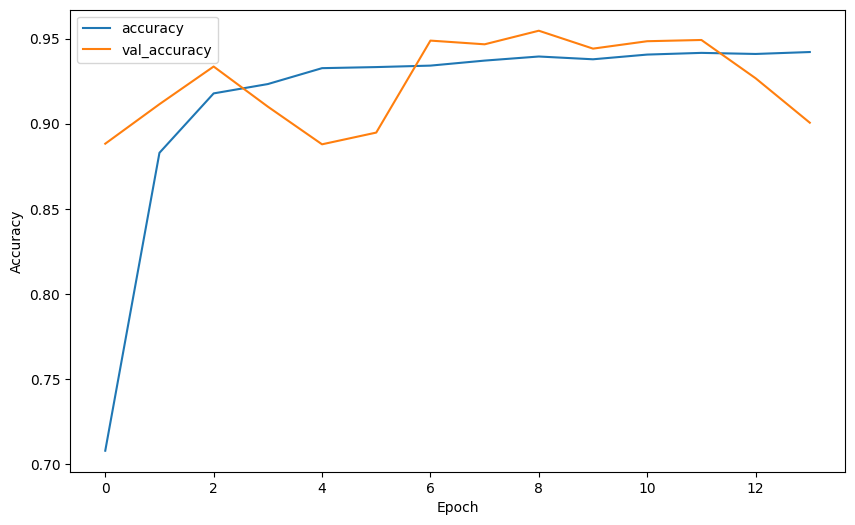

In [34]:
plt.figure(figsize=(10,6))
plt.plot(summary.accuracy, label="accuracy")
plt.plot(summary.val_accuracy, label="val_accuracy")
plt.legend(loc="upper left")
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.show()